In [ ]:
import io
import requests
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [ ]:
# Import dataset
import pandas as pd
DATA_DIR = "/content/gdrive/MyDrive/Principles of AI/ccfrauddetection.csv"
fraudDetection_df = pd.read_csv (DATA_DIR, header=0)
fraudDetection_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.551600,-0.617801,-0.311169,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,1.612727,1.065235,-0.143772,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,0.624501,0.066084,-0.165946,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.226487,0.178228,-0.287924,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.822843,0.538196,-1.119670,69.99,0


In [ ]:
# Total number of transaction 
len(fraudDetection_df)

284807

In [ ]:
print("Number of normal transaction in the dataset")
fraudDetection_df['Class'].value_counts()[0]

Number of normal transaction in the dataset


284315

In [ ]:
print("Number of fraud transaction in the dataset")
fraudDetection_df['Class'].value_counts()[1]

Number of fraud transaction in the dataset


492

In [ ]:
# Percentage of fraud transaction 
fraudDetection_df['Class'].value_counts(normalize=True)[1] * 100

0.1727485630620034

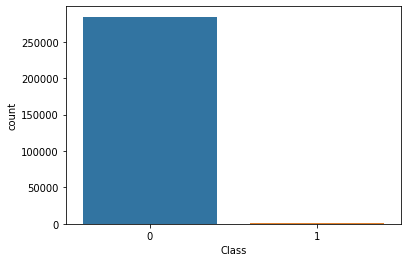

In [ ]:
# Check for imbalance data
import seaborn as sns
sns.countplot(x='Class', data=fraudDetection_df)

In [ ]:
# Preprocessing the data 
# Find how many missing values there are in the columns.
print (fraudDetection_df.isnull().sum())
df_dummies = pd.get_dummies(fraudDetection_df, drop_first=True)
print ('There are {} columns in df_dummies'.format (df_dummies.shape[1]))
# Shuffle Rows Prior to Splitting Data into Features (X) and Outcome (Y)
from sklearn.utils import shuffle

df_shuffled = shuffle (df_dummies, random_state=42) #random_state = 0, meaning no shuffling

DV = 'Class' # DV => Dependent variable

x = df_shuffled.drop (DV, axis=1) # axis=1, drop the DV column, don't axis = 0
y = df_shuffled [DV] # this our depenedent variable?

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
Amount    0
Class     0
dtype: int64
There are 10 columns in df_dummies


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import model_selection
#Splitting the data with pareto principle 
# 20% for training, The rest for testing
# random_state = 42 is used to select the 20% of the data set for testing randomly
x_train, x_test, y_train, y_test = model_selection.train_test_split (x, y, test_size=0.20, random_state=42)

x_train.head()

,Time,V1,V2,V3,V4,V5,V6,V7,Amount
83835,60048.0,-0.788237,0.691174,1.767582,-1.452146,1.015670,0.777573,0.018061,5.37
37766,39094.0,-1.063987,0.295210,1.326196,-0.271287,0.454441,-0.277431,-1.107715,58.19
13920,24693.0,1.240949,0.451314,0.344166,0.697893,2.385716,-1.382097,1.208092,1.29
185741,126804.0,0.139945,0.786389,0.482759,-0.488186,-0.406744,0.359711,-1.813852,21.09
106119,69833.0,-0.669670,-0.415620,1.575967,-2.576965,-2.062289,-0.844115,-1.208502,100.45


In [ ]:
x_train.shape, y_train.shape

((227845, 9), (227845,))

In [ ]:
x_test.shape, y_test.shape

((56962, 9), (56962,))

In [ ]:
# Question 2 define and build neural network 
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

In [ ]:
classifier = Sequential()
classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu', input_dim = 9)) 
classifier.add(Dropout(rate = 0.1))
classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu')) 
classifier.add(Dropout(rate = 0.1))
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid')) 
classifier.add(Dropout(rate = 0.1))
classifier.compile(optimizer = 'adam', loss='binary_crossentropy' , metrics=['accuracy'])
classifier.fit(x_train, y_train, batch_size = 25, epochs = 100)

Epoch 1/100
9114/9114 [==============================] - 18s 2ms/step - loss: 0.0315 - accuracy: 0.9967
Epoch 2/100
9114/9114 [==============================] - 17s 2ms/step - loss: 0.0266 - accuracy: 0.9983
Epoch 3/100
9114/9114 [==============================] - 17s 2ms/step - loss: 0.0266 - accuracy: 0.9983
Epoch 4/100
9114/9114 [==============================] - 16s 2ms/step - loss: 0.0266 - accuracy: 0.9983
Epoch 5/100
9114/9114 [==============================] - 19s 2ms/step - loss: 0.0266 - accuracy: 0.9983
Epoch 6/100
9114/9114 [==============================] - 16s 2ms/step - loss: 0.0266 - accuracy: 0.9983
Epoch 7/100
9114/9114 [==============================] - 17s 2ms/step - loss: 0.0266 - accuracy: 0.9983
Epoch 8/100
9114/9114 [==============================] - 18s 2ms/step - loss: 0.0266 - accuracy: 0.9983
Epoch 9/100
9114/9114 [==============================] - 16s 2ms/step - loss: 0.0266 - accuracy: 0.9983
Epoch 10/100
9114/9114 [==============================] - 17s 2m

In [ ]:
import numpy as np
scores = classifier.evaluate(np.array(x_test), np.array(y_test))

1781/1781 [==============================] - 3s 2ms/step - loss: 0.0268 - accuracy: 0.9983


In [ ]:
train_score = classifier.evaluate(np.array(x_train), np.array(y_train))

7121/7121 [==============================] - 12s 2ms/step - loss: 0.0266 - accuracy: 0.9983


In [ ]:
print("\n%s: %.2f%%" % (classifier.metrics_names[1], scores[1]*100))


accuracy: 99.83%


In [ ]:
# Get predictions
train_set_preds = [round(x[0]) for x in classifier.predict(x_train)]
test_set_preds = [round(x[0]) for x in classifier.predict(x_test)]

In [ ]:
from sklearn.metrics import accuracy_score, roc_curve, auc
print('Accuracy for test set: %0.4f' % accuracy_score(y_test, test_set_preds))
print('Accuracy for train set: %0.4f' % accuracy_score(y_train, train_set_preds))


Accuracy for test set: 0.9983
Accuracy for train set: 0.9983


In [ ]:
train_preds = [x[0] for x in classifier.predict(x_train)]
test_preds = [x[0] for x in classifier.predict(x_test)]

In [ ]:
from sklearn.metrics import roc_curve, auc
# Get AUC 
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, train_preds)
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, test_preds)

train_roc_auc = auc(train_fpr, train_tpr)
test_roc_auc = auc(test_fpr, test_tpr)

print('AUC for train set: %0.4f' % train_roc_auc)
print('AUC for test set: %0.4f' % test_roc_auc)

AUC for train set: 0.5000
AUC for test set: 0.5000


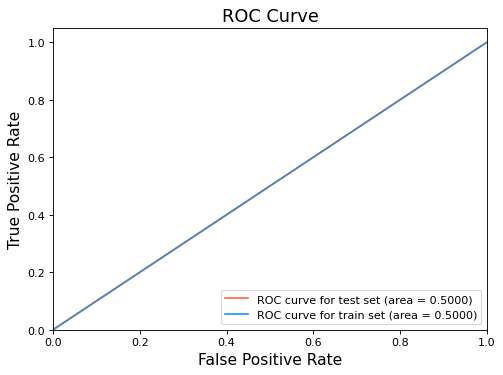

In [ ]:
import matplotlib.pyplot as plt
# Visualize ROC curve
plt.figure(figsize=(7, 5), dpi=80)
plt.plot(test_fpr,
         test_tpr,
         color='tomato',
         label='ROC curve for test set (area = %0.4f)' % test_roc_auc)
plt.plot(train_fpr,
         train_tpr,
         color='dodgerblue',
         label='ROC curve for train set (area = %0.4f)' % train_roc_auc)

plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('ROC Curve', fontsize=16)
plt.legend(loc="lower right")

plt.show()

In [ ]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression()

In [ ]:
# fit the model with data
logreg.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [ ]:
#
y_pred=logreg.predict(x_test)

from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9971033320459254

In [ ]:
train_preds_logreg = [x[0] for x in classifier.predict(x_train)]
test_preds_logreg = [x[0] for x in classifier.predict(x_test)]

In [ ]:
# Get AUC 
train_fpr_logreg, train_tpr_logreg, train_thresholds = roc_curve(y_train, train_preds_logreg)
test_fpr_logreg, test_tpr_logreg, test_thresholds = roc_curve(y_test, test_preds_logreg)

train_roc_auc_logreg = auc(train_fpr_logreg, train_tpr_logreg)
test_roc_auc_logreg = auc(test_fpr_logreg, test_tpr_logreg)

print('AUC for train set: %0.4f' % train_roc_auc_logreg)
print('AUC for test set: %0.4f' % test_roc_auc_logreg)

AUC for train set: 0.5000
AUC for test set: 0.5000


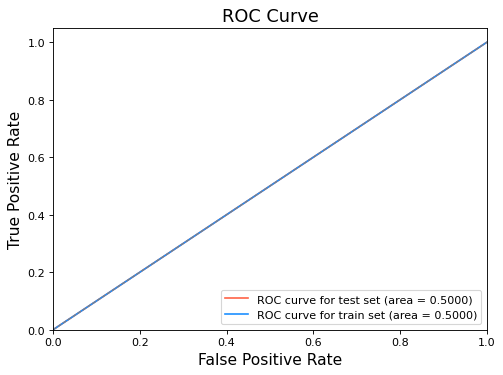

In [ ]:
import matplotlib.pyplot as plt
# Visualize ROC curve
plt.figure(figsize=(7, 5), dpi=80)
plt.plot(test_fpr_logreg,
         test_fpr_logreg,
         color='tomato',
         label='ROC curve for test set (area = %0.4f)' % test_roc_auc_logreg)
plt.plot(train_fpr_logreg,
         train_fpr_logreg,
         color='dodgerblue',
         label='ROC curve for train set (area = %0.4f)' % train_roc_auc_logreg)

plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('ROC Curve', fontsize=16)
plt.legend(loc="lower right")

plt.show()